## Deployment Playground for OCEAN_METAR project

In [2]:
import sys
package_path = '/home/Lakehouse/DreamBrookPy'
if package_path not in sys.path:
    sys.path.append(package_path)
import DreamBrookPy.MachineLearning as ML
import DreamBrookPy.DataChef as DC

2024-02-18 08:24:29.279809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
import importlib

In [61]:
importlib.reload(ML)

<module 'DreamBrookPy.MachineLearning' from '/home/Lakehouse/DreamBrookPy/DreamBrookPy/MachineLearning.py'>

In [3]:
## General Import
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [4]:
# # Assuming my_full_metar_dict is your final dictionary
# file_path = '../results/my_full_metar_dict.pkl'  # Specify the file path and name
# # Save the dictionary into a binary file using pickle

def savedict(file_path, dict_name):
    """Save dictionary dict_name to file_path"""
    with open(file_path, 'wb') as file:
        pickle.dump(dict_name, file)
        print(f"The data dictionary has been saved to {file_path}.")

## Load Dataset 

In [5]:
filepath = '../results/Full_Cleaned_METAR_dict.pkl' 
with open(filepath, 'rb') as file:
    raw_METAR_data = pickle.load(file)

In [6]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'bool_wind_min_var', 'bool_wind_max_var', 'wind_mind_var'])

In [7]:
filepath = '../results/my_full_metar_dict.pkl' 
with open(filepath, 'rb') as file:
    metar_dataset = pickle.load(file)

In [45]:
metar_dataset[29930]

{'_wind': Wind[speed=5, direction=ESE, gust=None, degrees=120, unit=KT, min_variation=None, max_variation=None],
 '_visibility': Visibility[distance=10SM, min_distance=None, min_direction=None],
 '_vertical_visibility': None,
 '_wind_shear': None,
 '_cavok': None,
 '_remark': 'automated station with a precipitation discriminator sea level pressure of 1014.1 HPa  hourly temperature of 27.2°C and dew point of 22.2°C  $',
 '_remarks': ['automated station with a precipitation discriminator',
  'sea level pressure of 1014.1 HPa',
  '',
  'hourly temperature of 27.2°C and dew point of 22.2°C',
  '',
  '$'],
 '_clouds': [Cloud[height=1500, quantity=CloudQuantity.FEW, type=None],
  Cloud[height=17000, quantity=CloudQuantity.OVC, type=None]],
 '_weather_conditions': [],
 '_day': 4,
 '_time': datetime.time(21, 53),
 '_message': 'KMIA 042153Z 12005KT 10SM FEW015 OVC170 27/22 A2995 RMK AO2 SLP141 T02720222 $',
 '_station': 'KMIA',
 '_flags': set(),
 '_trends': [],
 '_temperature': 27,
 '_dew_point

In [75]:
remark_list = []
weather_list = []
phenomena_list = []
cavok_list = []
run_list = []
for i in list(metar_dataset.keys()):
    r = metar_dataset[i]['_remark']
    w = metar_dataset[i]['_weather_conditions']
    c = metar_dataset[i]['_cavok']
    run = metar_dataset[i]['_runways_info']
    remark_list.append(r)
    weather_list.append(w)
    cavok_list.append(c)
    run_list.append(run)
    try :
        phenomena_list.append(metar_dataset[i]['_weather_conditions'][0].phenomenons)
    except:
        phenomena_list.append('Nothing')
weather_cond_dict = pd.DataFrame({'remark':remark_list,
                                 'weather':weather_list,
                                 'phenomena':phenomena_list,
                                 'cavok':cavok_list,
                                 'runway_info':run_list})

In [76]:
weather_cond_dict.to_csv('../results/weather_condition.csv')

In [74]:
weather_cond_dict['weather'].value_counts()

phenomena
Nothing                      82406
[Phenomenon.RAIN]             4916
[]                            1547
[Phenomenon.MIST]              453
[Phenomenon.FOG]                72
[Phenomenon.HAZE]               39
[Phenomenon.SMOKE]              15
[Phenomenon.DRIZZLE]             2
[Phenomenon.FUNNEL_CLOUD]        1
Name: count, dtype: int64

In [89]:
raw_METAR_data['day'][:5]

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int32

In [91]:
raw_METAR_data['month'][:5]

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int32

In [85]:
phenom_list = ['RAIN', 'MIST', 'FOG', 'HAZE', 'SMOKE', 'DRIZZLE', 'FUNNEL_CLOUD']
phenom_value = [4916,453,72,39,15,2,1]
phenom_df = pd.DataFrame({'Weather Phenomena': phenom_list,
                         'Occurance Count': phenom_value})
phenom_df

,Weather Phenomena,Occurance Count
0,RAIN,4916
1,MIST,453
2,FOG,72
3,HAZE,39
4,SMOKE,15
5,DRIZZLE,2
6,FUNNEL_CLOUD,1


In [ ]:
174 Runway info out of close to 90000 data points, so only about 0.2 % of days that there's special attention need to be placed on runway out of the ordinary

In [62]:
with open('../results/weather_cond.txt', 'w') as file:
    file.write(congested_text)

In [61]:
congested_text = '\n'.join(weather_cond_dict.astype(str).agg(''.join, axis=1))

# Test ML pipeline with different training and test data size 

In [ ]:
# In general we want to use Hour as the training data, but we may differ the data based on month or year too. 

In [ ]:
# 10 Target Features to predict:
1. Wind Degree
2. Wind Speed
3. Boolean test: Wind Var exist = T/F ; if T, predict Wind_MIN_Var & MAX_Var
4. N_Cloud Layers Classification ; For each cloud layer, Predict CLOUD_Height
5. Temperature
6. Dew
7. Air Pressure

In [8]:
# since the prediction gonna be based on Hour based data, we use hour here
hour = raw_METAR_data['hour']

## 1. Wind Degree

In [21]:
wind_degree_data = raw_METAR_data['wind_degrees']

In [34]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = wind_degree_data 
Wind_Degree_Results = {} # Container for finalized data
wind_degree_result_6,wind_degree_result_24,wind_degree_result_48 = [None, None, None]
result_list = [wind_degree_result_6,wind_degree_result_24,wind_degree_result_48]
param_list = [6,24,48]
data_id = 'set1_window'
datadir = f'../results/wind_degree_{data_id}'

for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
        'window_size':p, 'scaling':'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 

    ### Provide Data Container
    Wind_Degree_Results.update(new_data)

>>> Starting Training for param = 6...
Epoch 1: loss = 0.14433994889259338, duration = 6.83 seconds
Epoch 11: loss = 0.08702535182237625, duration = 0.36 seconds
Epoch 21: loss = 0.0665743425488472, duration = 0.33 seconds
Epoch 31: loss = 0.06485124677419662, duration = 0.39 seconds
Epoch 41: loss = 0.06756869703531265, duration = 0.39 seconds
Epoch 51: loss = 0.06740204244852066, duration = 0.36 seconds
Epoch 61: loss = 0.06399480998516083, duration = 0.38 seconds
Epoch 71: loss = 0.06139504909515381, duration = 0.41 seconds
Epoch 81: loss = 0.06377290189266205, duration = 0.46 seconds
Epoch 91: loss = 0.06439529359340668, duration = 0.35 seconds
7/7 [==============================] - 1s 4ms/step
The root mean squared error is 70.95432877611718.
The data dictionary has been saved to ../results/wind_degree_set1_window6.pkl.
>>> Starting Training for param = 24...
Epoch 1: loss = 0.12082864344120026, duration = 8.03 seconds
Epoch 11: loss = 0.08750995248556137, duration = 0.80 seconds


In [ ]:
Wind_Degree_Results.keys()

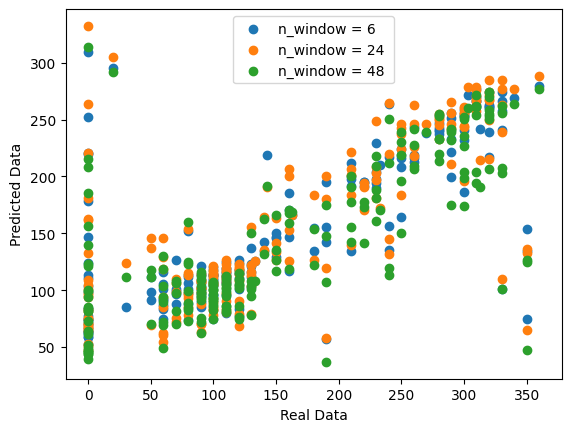

In [35]:
for p in param_list:
    d_to_plot = Wind_Degree_Results[f'set1_window{p}']
    plt.scatter(d_to_plot['dataset_test'],d_to_plot['y_pred_scaled'], label=f'n_window = {p} ')
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

### Set 2

In [92]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = wind_degree_data 
#Wind_Degree_Results = {} # Container for finalized data
wind_degree_result_3, wind_degree_result_6, wind_degree_result_12, wind_degree_result_24,wind_degree_result_48 = [None, None, None, None, None]
result_list = [wind_degree_result_3, wind_degree_result_6, wind_degree_result_12,wind_degree_result_24,wind_degree_result_48]
param_list = [3,6,12,24,48]
data_id = 'set2_window'
datadir = f'../results/wind_degree_{data_id}'

for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling':'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 

    ### Provide Data Container
    Wind_Degree_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = 0.07296659052371979, duration = 10.14 seconds
Epoch 11: loss = 0.052078451961278915, duration = 2.48 seconds
Epoch 21: loss = 0.05015058070421219, duration = 2.45 seconds
Epoch 31: loss = 0.049716658890247345, duration = 2.32 seconds
Epoch 41: loss = 0.04909709841012955, duration = 3.07 seconds
Epoch 51: loss = 0.049075137823820114, duration = 2.56 seconds
Epoch 61: loss = 0.049123428761959076, duration = 2.77 seconds
Epoch 71: loss = 0.04898856580257416, duration = 3.32 seconds
Epoch 81: loss = 0.04890057072043419, duration = 2.57 seconds
Epoch 91: loss = 0.049007754772901535, duration = 2.86 seconds
32/32 [==============================] - 2s 2ms/step
The root mean squared error is 72.1890778647719.
The data dictionary has been saved to ../results/wind_degree_set2_window3.pkl.
>>> Starting Training for param = 6...
Epoch 1: loss = 0.07515276968479156, duration = 10.94 seconds
Epoch 11: loss = 0.05147877708077431, duration = 3.79 

## 2. Wind Speed 

In [8]:
wind_speed_data = raw_METAR_data['wind_speed']

In [38]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = wind_speed_data 
Wind_Speed_Results = {} # Container for finalized data
wind_speed_result_6,wind_speed_result_24,wind_speed_result_48 = [None, None, None]
result_list = [wind_speed_result_6,wind_speed_result_24,wind_speed_result_48]
param_list = [6,24,48]
data_id = 'set1_window'
datadir = f'../results/wind_speed_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
        'window_size':p,
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Wind_Speed_Results.update(new_data)

>>> Starting Training for param = 6...
Epoch 1: loss = 0.07961418479681015, duration = 6.86 seconds
Epoch 11: loss = 0.031787484884262085, duration = 0.33 seconds
Epoch 21: loss = 0.0251499991863966, duration = 0.36 seconds
Epoch 31: loss = 0.02310243807733059, duration = 0.31 seconds
Epoch 41: loss = 0.02228592522442341, duration = 0.39 seconds
Epoch 51: loss = 0.0222468301653862, duration = 0.38 seconds
Epoch 61: loss = 0.02201652340590954, duration = 0.41 seconds
Epoch 71: loss = 0.022887593135237694, duration = 0.39 seconds
Epoch 81: loss = 0.021556518971920013, duration = 0.42 seconds
Epoch 91: loss = 0.02156267873942852, duration = 0.36 seconds
7/7 [==============================] - 1s 3ms/step
The root mean squared error is 2.203355744734822.
The data dictionary has been saved to ../results/wind_speed_set1_window6.pkl.
>>> Starting Training for param = 24...
Epoch 1: loss = 0.06718505173921585, duration = 8.09 seconds
Epoch 11: loss = 0.030447879806160927, duration = 0.94 second

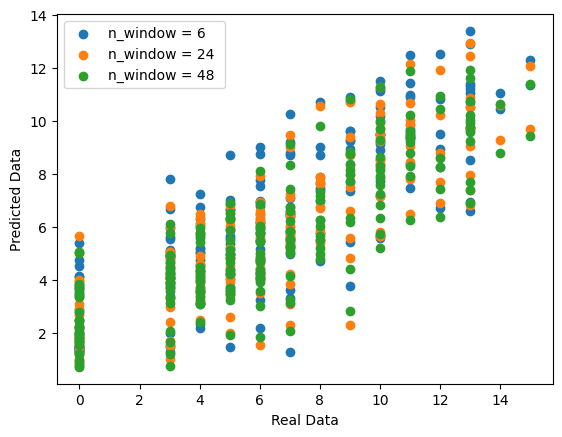

In [39]:
for p in param_list:
    d_to_plot = Wind_Speed_Results[f'set1_window{p}']
    plt.scatter(d_to_plot['dataset_test'],d_to_plot['y_pred_scaled'], label=f'n_window = {p} ')
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

#### Set 2

In [13]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = wind_speed_data 
Wind_Speed_Results = {} # Container for finalized data
wind_speed_result_3, wind_speed_result_6, wind_speed_result_12, wind_speed_result_24,wind_speed_result_48 = [None, None, None, None, None]
result_list = [wind_speed_result_3, wind_speed_result_6, wind_speed_result_12, wind_speed_result_24,wind_speed_result_48 ]
param_list = [3,6,12,24,48]
data_id = 'set2_window'
datadir = f'../results/wind_speed_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling':'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################

    ### Provide Data Container
    Wind_Speed_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = 0.01533044409006834, duration = 9.19 seconds
Epoch 11: loss = 0.008715607225894928, duration = 2.77 seconds
Epoch 21: loss = 0.008552580140531063, duration = 3.00 seconds
Epoch 31: loss = 0.00854476261883974, duration = 2.82 seconds
Epoch 41: loss = 0.00835850927978754, duration = 3.05 seconds
Epoch 51: loss = 0.008356830105185509, duration = 2.93 seconds
Epoch 61: loss = 0.008347850292921066, duration = 3.32 seconds
Epoch 71: loss = 0.00827023945748806, duration = 2.49 seconds
Epoch 81: loss = 0.008313028141856194, duration = 3.22 seconds
Epoch 91: loss = 0.008268272504210472, duration = 3.36 seconds
32/32 [==============================] - 1s 5ms/step
The root mean squared error is 2.3984588793044757.
The data dictionary has been saved to ../results/wind_speed_set2_window3.pkl.
>>> Starting Training for param = 6...
Epoch 1: loss = 0.01769414357841015, duration = 19.90 seconds
Epoch 11: loss = 0.008743850514292717, duration = 4.1

## 3. Wind Var

### 3.1 Wind Var Exist ?

### 3.2 Wind Var Min

### 3.3. Wind Var Max

## 4. Clouds

### 4.1 N_Clouds Classification

In [12]:
cloud_layers_data = raw_METAR_data['n_cloud_layers']

In [44]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = cloud_layers_data
Cloud_Layers_Results = {} # Container for finalized data
cloud_layers_result_6,cloud_layers_result_24,cloud_layers_result_48 = [None, None, None]
result_list = [cloud_layers_result_6,cloud_layers_result_24,cloud_layers_result_48]
param_list = [6,24,48]
data_id = 'set1_window'
datadir = f'../results/cloud_layers_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
        'window_size':p,
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Cloud_Layers_Results.update(new_data)

>>> Starting Training for param = 6...
Epoch 1: loss = 0.11144516617059708, duration = 7.20 seconds
Epoch 11: loss = 0.04622023552656174, duration = 0.34 seconds
Epoch 21: loss = 0.03513141721487045, duration = 0.36 seconds
Epoch 31: loss = 0.032131753861904144, duration = 0.40 seconds
Epoch 41: loss = 0.03269817680120468, duration = 0.30 seconds
Epoch 51: loss = 0.03199993818998337, duration = 0.43 seconds
Epoch 61: loss = 0.030251501128077507, duration = 0.43 seconds
Epoch 71: loss = 0.03111131303012371, duration = 0.38 seconds
Epoch 81: loss = 0.029957883059978485, duration = 0.43 seconds
Epoch 91: loss = 0.030289407819509506, duration = 0.38 seconds
7/7 [==============================] - 1s 4ms/step
The root mean squared error is 0.5801299585503853.
The data dictionary has been saved to ../results/cloud_layers_set1_window6.pkl.
>>> Starting Training for param = 24...
Epoch 1: loss = 0.0964154303073883, duration = 7.58 seconds
Epoch 11: loss = 0.04562918841838837, duration = 1.01 se

In [62]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = cloud_layers_data
Cloud_Layers_Results_no_scale = {} # Container for finalized data
cloud_layers_result_6,cloud_layers_result_24,cloud_layers_result_48 = [None, None, None]
result_list = [cloud_layers_result_6,cloud_layers_result_24,cloud_layers_result_48]
param_list = [6,24,48]
data_id = 'set1_window'
datadir = f'../results/cloud_layers_no_scale_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
        'window_size':p, 'scaling' : 'Normal',
    }
    ## Default scaling should be 'MinMax', which range from (0,1)
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Cloud_Layers_Results_no_scale.update(new_data)

# NO_SCALE DOESN'T HELP in this case.

>>> Starting Training for param = 6...
Epoch 1: loss = 1.9275579452514648, duration = 8.79 seconds
Epoch 11: loss = 0.645940363407135, duration = 0.48 seconds
Epoch 21: loss = 0.5567461848258972, duration = 0.40 seconds
Epoch 31: loss = 0.5328808426856995, duration = 0.57 seconds
Epoch 41: loss = 0.5220677256584167, duration = 0.43 seconds
Epoch 51: loss = 0.5060551762580872, duration = 0.43 seconds
Epoch 61: loss = 0.5098639726638794, duration = 0.34 seconds
Epoch 71: loss = 0.49676549434661865, duration = 0.39 seconds
Epoch 81: loss = 0.49879348278045654, duration = 0.39 seconds
Epoch 91: loss = 0.4892899990081787, duration = 0.42 seconds
7/7 [==============================] - 2s 4ms/step
The root mean squared error is 0.612922782844743.
The data dictionary has been saved to ../results/cloud_layers_no_scale_set1_window6.pkl.
>>> Starting Training for param = 24...
Epoch 1: loss = 1.5679454803466797, duration = 10.85 seconds
Epoch 11: loss = 0.5656049251556396, duration = 1.17 seconds

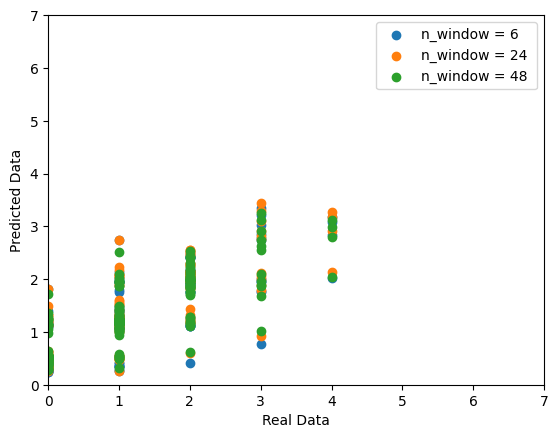

In [54]:
for p in param_list:
    d_to_plot = Cloud_Layers_Results[f'set1_window{p}']
    plt.scatter(d_to_plot['dataset_test'],d_to_plot['y_pred_scaled'], label=f'n_window = {p} ')
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

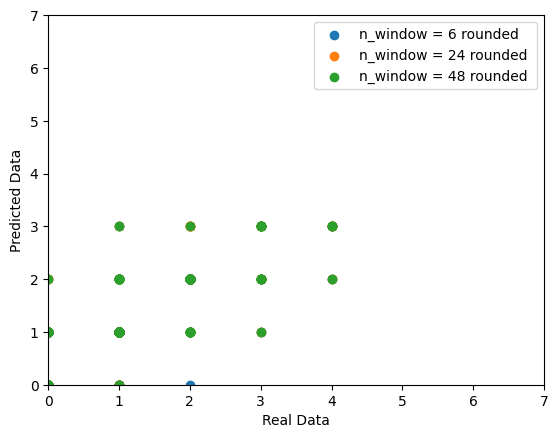

In [53]:
# for p in param_list:
#     d_to_plot = Cloud_Layers_Results[f'set1_window{p}']
#     plt.scatter(d_to_plot['dataset_test'],d_to_plot['y_pred_scaled'], label=f'n_window = {p} ')
for p in param_list:
    d_to_plot = Cloud_Layers_Results[f'set1_window{p}']
    plt.scatter(d_to_plot['dataset_test'],np.around(d_to_plot['y_pred_scaled']), label=f'n_window = {p} rounded ')
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

In [13]:
### Set2

In [14]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = cloud_layers_data 
Cloud_Layers_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
cloud_layers_result_3, cloud_layers_result_6,cloud_layers_result_12,cloud_layers_result_24,cloud_layers_result_48 = [None, None, None,None,None]
result_list = [cloud_layers_result_3, cloud_layers_result_6,cloud_layers_result_12,cloud_layers_result_24,cloud_layers_result_48]
param_list = [3, 6,12, 24,48]
data_id = 'set2_window'
datadir = f'../results/cloud_layers_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Cloud_Layers_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = 0.03717038407921791, duration = 8.53 seconds
Epoch 11: loss = 0.020861128345131874, duration = 2.50 seconds
Epoch 21: loss = 0.020533785223960876, duration = 2.77 seconds
Epoch 31: loss = 0.02051580511033535, duration = 2.36 seconds
Epoch 41: loss = 0.02036341466009617, duration = 2.63 seconds
Epoch 51: loss = 0.02024827152490616, duration = 2.74 seconds
Epoch 61: loss = 0.020361732691526413, duration = 2.46 seconds
Epoch 71: loss = 0.020289624109864235, duration = 2.39 seconds
Epoch 81: loss = 0.020291024819016457, duration = 2.95 seconds
Epoch 91: loss = 0.020208068192005157, duration = 2.55 seconds
32/32 [==============================] - 2s 4ms/step
The root mean squared error is 0.7051284032985138.
The data dictionary has been saved to ../results/cloud_layers_set2_window3.pkl.
>>> Starting Training for param = 6...
Epoch 1: loss = 0.03866668418049812, duration = 10.99 seconds
Epoch 11: loss = 0.020878147333860397, duration = 3

### 4.2 Cloud_heights for each layers 

In [15]:
# Layer1 
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure'])

In [25]:
cloud_1_height = raw_METAR_data['clouds_1_layer']['layer_1']['height']
cloud_1_type = raw_METAR_data['clouds_1_layer']['layer_1']['quantity_num']

In [ ]:
# Check for NaN and Fix

In [27]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = cloud_1_height
Cloud_1_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
cloud_1_result_3, cloud_1_result_6,cloud_1_result_12,cloud_1_result_24,cloud_1_result_48 = [None, None, None,None,None]
result_list = [cloud_1_result_3, cloud_1_result_6,cloud_1_result_12,cloud_1_result_24,cloud_1_result_48]
param_list = [3, 6,12, 24,48]
data_id = 'set2_window'
datadir = f'../results/cloud_1_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Cloud_1_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = nan, duration = 10.09 seconds
Epoch 11: loss = nan, duration = 2.80 seconds
Epoch 21: loss = nan, duration = 2.43 seconds


KeyboardInterrupt: 

In [28]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = cloud_1_type
Cloud_1_Type_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
cloud_1_type_result_3, cloud_1_type_result_6,cloud_1_type_result_12,cloud_1_type_result_24,cloud_1_type_result_48 = [None, None, None,None,None]
result_list = [cloud_1_type_result_3, cloud_1_type_result_6,cloud_1_type_result_12,cloud_1_type_result_24,cloud_1_type_result_48]
param_list = [3, 6,12, 24,48]
data_id = 'set2_window'
datadir = f'../results/cloud_1_type_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Cloud_1_Type_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = 0.05215740203857422, duration = 8.83 seconds
Epoch 11: loss = 0.03899076208472252, duration = 2.41 seconds
Epoch 21: loss = 0.038930218666791916, duration = 2.30 seconds
Epoch 31: loss = 0.03841431438922882, duration = 2.31 seconds
Epoch 41: loss = 0.03827908635139465, duration = 2.35 seconds
Epoch 51: loss = 0.038346197456121445, duration = 2.65 seconds
Epoch 61: loss = 0.038405075669288635, duration = 2.25 seconds
Epoch 71: loss = 0.038163140416145325, duration = 2.52 seconds
Epoch 81: loss = 0.0381893515586853, duration = 2.42 seconds
Epoch 91: loss = 0.03813762217760086, duration = 2.36 seconds
32/32 [==============================] - 1s 2ms/step
The root mean squared error is 1.593203993525063.
The data dictionary has been saved to ../results/cloud_1_type_set2_window3.pkl.
>>> Starting Training for param = 6...
Epoch 1: loss = 0.05582568794488907, duration = 9.95 seconds
Epoch 11: loss = 0.03878884017467499, duration = 3.69 se

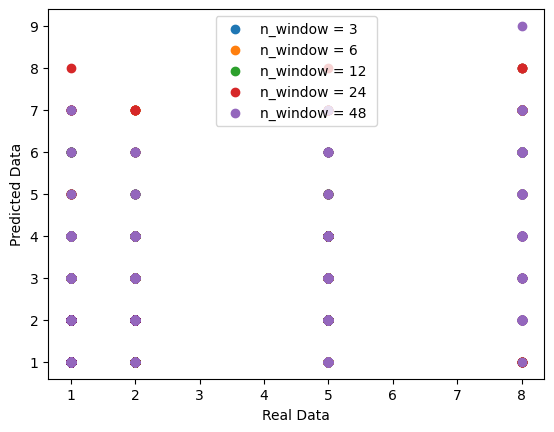

In [31]:
######### Real Data
for p in param_list:
    d_to_plot =  Cloud_1_Type_Results[f'set2_window{p}']
    plt.scatter(d_to_plot['dataset_test'],np.around(d_to_plot['y_pred_scaled']), label=f'n_window = {p} ')


# # Setting the x and y axis limits to include the grey area
# plt.xlim(xmin_extended, xmax_extended)
# plt.ylim(ymin_extended, ymax_extended)


plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

## 5.Temperature

In [14]:
temperature_data = raw_METAR_data['temperature']

In [67]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = temperature_data 
Temperature_Results = {} # Container for finalized data
temperature_result_6,temperature_result_24,temperature_result_48 = [None, None, None]
result_list = [temperature_result_6,temperature_result_24,temperature_result_48]
param_list = [6,24,48]
data_id = 'set1_window'
datadir = f'../results/temperature_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Temperature_Results.update(new_data)

>>> Starting Training for param = 6...
Epoch 1: loss = 0.14533193409442902, duration = 9.88 seconds
Epoch 11: loss = 0.02146519348025322, duration = 0.53 seconds
Epoch 21: loss = 0.012972831726074219, duration = 0.77 seconds
Epoch 31: loss = 0.00987967848777771, duration = 0.36 seconds
Epoch 41: loss = 0.007045394740998745, duration = 0.46 seconds
Epoch 51: loss = 0.005625169724225998, duration = 0.38 seconds
Epoch 61: loss = 0.004852627404034138, duration = 0.36 seconds
Epoch 71: loss = 0.004568328149616718, duration = 0.34 seconds
Epoch 81: loss = 0.004458237439393997, duration = 0.37 seconds
Epoch 91: loss = 0.003907135222107172, duration = 0.44 seconds
7/7 [==============================] - 1s 4ms/step
The root mean squared error is 1.0126029063540483.
The data dictionary has been saved to ../results/temperature_set1_window6.pkl.
>>> Starting Training for param = 24...
Epoch 1: loss = 0.09763383865356445, duration = 8.91 seconds
Epoch 11: loss = 0.019160153344273567, duration = 1.2

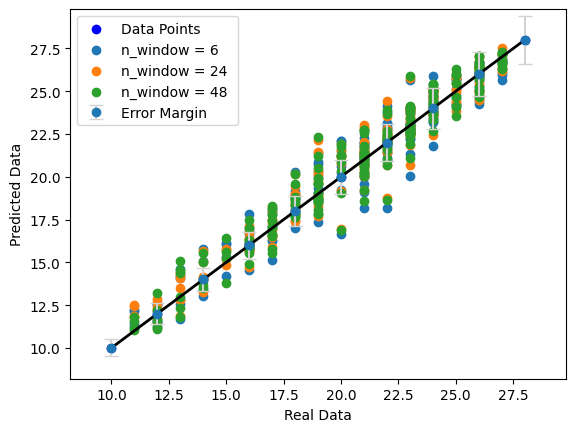

In [75]:
xmin,xmax,ymin,ymax = [10,28,10,28]
plt.plot([xmin, xmax], [ymin, ymax], c = 'k', lw= '2' ) # Straight line for comparison

# Error Margin
x_values = np.linspace(xmin, xmax, 10)  # Generate 10 x-values between xmin and xmax
y_values = np.linspace(ymin, ymax, 10)  # Generate corresponding y-values for the straight line

# Calculate 5-10% error margins for y-values
error = y_values * 0.05  # Change 0.1 to 0.05 for 5% error

# Plotting scatter points along the straight line
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Adding error bars
plt.errorbar(x_values, y_values, yerr=error, fmt='o', ecolor='lightgray', label='Error Margin', capsize=5)

######### Real Data
for p in param_list:
    d_to_plot = Temperature_Results[f'set1_window{p}']
    plt.scatter(d_to_plot['dataset_test'],d_to_plot['y_pred_scaled'], label=f'n_window = {p} ')


# Setting the x and y axis limits to include the grey area
plt.xlim(xmin_extended, xmax_extended)
plt.ylim(ymin_extended, ymax_extended)


plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

### Set 2 [More Training Data with Small Window]

In [15]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = temperature_data 
Temperature_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
temperature_result_3, temperature_result_6,temperature_result_12,temperature_result_24,temperature_result_48 = [None, None, None,None,None]
result_list = [temperature_result_3, temperature_result_6,temperature_result_12,temperature_result_24,temperature_result_48]
param_list = [3, 6,12, 24,48]
data_id = 'set2_window'
datadir = f'../results/temperature_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Temperature_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = 0.031679023057222366, duration = 9.66 seconds
Epoch 11: loss = 0.002641819417476654, duration = 2.84 seconds
Epoch 21: loss = 0.001814141869544983, duration = 2.91 seconds
Epoch 31: loss = 0.0016252895584329963, duration = 2.82 seconds
Epoch 41: loss = 0.0016779451398178935, duration = 3.02 seconds
Epoch 51: loss = 0.0015782593982294202, duration = 2.77 seconds
Epoch 61: loss = 0.0015920876758173108, duration = 2.63 seconds
Epoch 71: loss = 0.0015833796933293343, duration = 2.84 seconds
Epoch 81: loss = 0.0015867489855736494, duration = 3.10 seconds
Epoch 91: loss = 0.0015409026527777314, duration = 3.60 seconds
32/32 [==============================] - 2s 6ms/step
The root mean squared error is 0.871395809145427.
The data dictionary has been saved to ../results/temperature_set2_window3.pkl.
>>> Starting Training for param = 6...
Epoch 1: loss = 0.026363516226410866, duration = 10.56 seconds
Epoch 11: loss = 0.002727074082940817, du

#### Set 3 With 50000 Training Data (across 5-6 years) and to predict 10000 hours (more than a year)
For the best set consider to train based on Every other year vs continuous one. Always go for first v1 before improve

In [ ]:
'n_train' :50000, 
    'n_test' : 10000,

## 6. Dew

In [324]:
dew_data = raw_METAR_data['dew']

In [ ]:
# Data Check : then save data after checking

In [77]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = dew_data 
Dew_Results = {} # Container for finalized data
dew_result_6,dew_result_24,dew_result_48 = [None, None, None]
result_list = [dew_result_6,dew_result_24,dew_result_48]
param_list = [6,24,48]
data_id = 'set1_window'
datadir = f'../results/dew_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Dew_Results.update(new_data)

>>> Starting Training for param = 6...
Epoch 1: loss = 0.18095000088214874, duration = 9.21 seconds
Epoch 11: loss = 0.01320179644972086, duration = 0.46 seconds
Epoch 21: loss = 0.012320551089942455, duration = 0.42 seconds
Epoch 31: loss = 0.009950940497219563, duration = 0.49 seconds
Epoch 41: loss = 0.008206366561353207, duration = 0.38 seconds
Epoch 51: loss = 0.006785944104194641, duration = 0.49 seconds
Epoch 61: loss = 0.0074839238077402115, duration = 0.53 seconds
Epoch 71: loss = 0.0060837240889668465, duration = 0.45 seconds
Epoch 81: loss = 0.004632083233445883, duration = 0.39 seconds
Epoch 91: loss = 0.0046004788018763065, duration = 0.45 seconds
7/7 [==============================] - 1s 4ms/step
The root mean squared error is 1.1791970013702648.
The data dictionary has been saved to ../results/dew_set1_window6.pkl.
>>> Starting Training for param = 24...
Epoch 1: loss = 0.11009609699249268, duration = 8.04 seconds
Epoch 11: loss = 0.020038116723299026, duration = 0.95 se

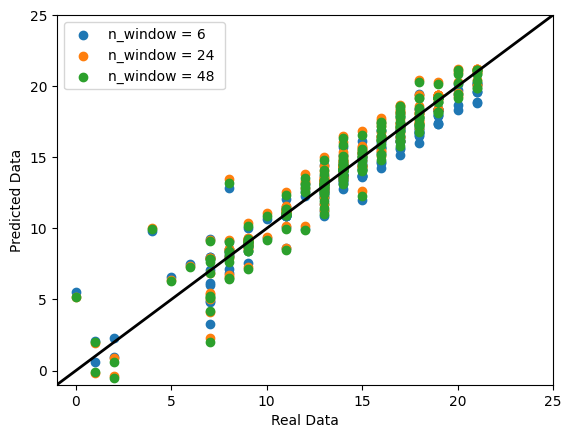

In [81]:
# Setting the x and y axis limits 
xmin,xmax,ymin,ymax = [-1,25,-1,25]
plt.plot([xmin, xmax], [ymin, ymax], c = 'k', lw= '2' ) # Straight line for comparison
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


######### Real Data
for p in param_list:
    d_to_plot = Dew_Results[f'set1_window{p}']
    plt.scatter(d_to_plot['dataset_test'],d_to_plot['y_pred_scaled'], label=f'n_window = {p} ')





plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

#### Set 2

In [9]:
# Checking into original data
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = dew_data 
Dew_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
dew_result_48 = [None]
result_list = [dew_result_48]
param_list = [48]
data_id = 'set2_window'
datadir = f'../results/dew_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Dew_Results.update(new_data)

>>> Starting Training for param = 48...
Epoch 1: loss = 0.018143605440855026, duration = 21.05 seconds
Epoch 11: loss = 0.0025691369082778692, duration = 15.79 seconds
Epoch 21: loss = 0.0012865985045209527, duration = 18.05 seconds
Epoch 31: loss = 0.0010739568388089538, duration = 16.56 seconds
Epoch 41: loss = 0.0010915090097114444, duration = 17.03 seconds
Epoch 51: loss = 0.0010093074524775147, duration = 15.99 seconds
Epoch 61: loss = 0.0009833292569965124, duration = 15.13 seconds
Epoch 71: loss = 0.0009861449943855405, duration = 15.74 seconds
Epoch 81: loss = 0.001030953018926084, duration = 15.90 seconds
Epoch 91: loss = 0.0009527381625957787, duration = 15.20 seconds
32/32 [==============================] - 2s 21ms/step
The root mean squared error is 0.927360174381773.
The data dictionary has been saved to ../results/dew_set2_window48.pkl.


#### Set 3 

In [ ]:
# Checking into original data
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = dew_data 
Dew_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
dew_result_3, dew_result_6,dew_result_12,dew_result_24,dew_result_48 = [None, None, None,None,None]
result_list = [dew_result_3, dew_result_6,dew_result_12,dew_result_24,dew_result_48]
param_list = [3, 6,12, 24,48]
data_id = 'set3_window'
datadir = f'../results/dew_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :50000,'n_test' : 5000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Dew_Results.update(new_data)

##  7.Air_pressure

In [322]:
air_pressure_data = raw_METAR_data['air_pressure']

In [83]:
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = air_pressure_data 
Air_Pressure_Results = {} # Container for finalized data
air_pressure_result_6,air_pressure_result_24,air_pressure_result_48 = [None, None, None]
result_list = [air_pressure_result_6,air_pressure_result_24,air_pressure_result_48]
param_list = [6,24,48]
data_id = 'set1_window'
datadir = f'../results/air_pressure_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Air_Pressure_Results.update(new_data)

>>> Starting Training for param = 6...
Epoch 1: loss = 0.05911286175251007, duration = 10.21 seconds
Epoch 11: loss = 0.010943441651761532, duration = 0.46 seconds
Epoch 21: loss = 0.008406725712120533, duration = 0.38 seconds
Epoch 31: loss = 0.005646971054375172, duration = 0.41 seconds
Epoch 41: loss = 0.0036178287118673325, duration = 0.48 seconds
Epoch 51: loss = 0.00306069222278893, duration = 0.50 seconds
Epoch 61: loss = 0.0026690922677516937, duration = 0.33 seconds
Epoch 71: loss = 0.0026327481027692556, duration = 0.57 seconds
Epoch 81: loss = 0.002695108763873577, duration = 0.56 seconds
Epoch 91: loss = 0.0023383614607155323, duration = 0.38 seconds
7/7 [==============================] - 2s 6ms/step
The root mean squared error is 0.8053324741832935.
The data dictionary has been saved to ../results/air_pressure_set1_window6.pkl.
>>> Starting Training for param = 24...
Epoch 1: loss = 0.03787343204021454, duration = 10.34 seconds
Epoch 11: loss = 0.009769462049007416, durati

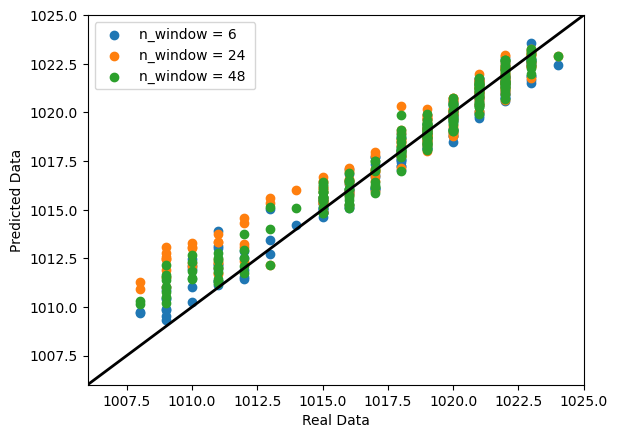

In [85]:
# Setting the x and y axis limits 
xmin,xmax,ymin,ymax = [1006,1025,1006,1025]
plt.plot([xmin, xmax], [ymin, ymax], c = 'k', lw= '2' ) # Straight line for comparison
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


######### Real Data
for p in param_list:
    d_to_plot = Air_Pressure_Results[f'set1_window{p}']
    plt.scatter(d_to_plot['dataset_test'],d_to_plot['y_pred_scaled'], label=f'n_window = {p} ')





plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()

#### Set 2

In [11]:
# Checking into original data
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = air_pressure_data 
Air_Pressure_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
air_pressure_result_3, air_pressure_result_6,air_pressure_result_12,air_pressure_result_24,air_pressure_result_48 = [None, None, None,None,None]
result_list = [air_pressure_result_3, air_pressure_result_6,air_pressure_result_12,air_pressure_result_24,air_pressure_result_48 ]
param_list = [3, 6,12, 24,48]
data_id = 'set2_window'
datadir = f'../results/air_pressure_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :10000,'n_test' : 1000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Air_Pressure_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = 0.01965906098484993, duration = 9.98 seconds
Epoch 11: loss = 0.0016460706247016788, duration = 2.95 seconds
Epoch 21: loss = 0.0012203921796754003, duration = 2.52 seconds
Epoch 31: loss = 0.0011846963316202164, duration = 2.96 seconds
Epoch 41: loss = 0.0011456693755462766, duration = 2.82 seconds
Epoch 51: loss = 0.0011320190969854593, duration = 2.97 seconds
Epoch 61: loss = 0.0011535391677170992, duration = 2.49 seconds
Epoch 71: loss = 0.0011178830172866583, duration = 2.60 seconds
Epoch 81: loss = 0.0011065335711464286, duration = 2.79 seconds
Epoch 91: loss = 0.0011051397304981947, duration = 2.81 seconds
32/32 [==============================] - 2s 3ms/step
The root mean squared error is 0.6471898499487151.
The data dictionary has been saved to ../results/air_pressure_set2_window3.pkl.
>>> Starting Training for param = 6...
Epoch 1: loss = 0.01597801223397255, duration = 10.38 seconds
Epoch 11: loss = 0.0015775329666212201,

#### Set 3 

In [323]:
# Checking into original data
### Everything is here in 1 Cell to avoid confusions. Later will automate this for batch processing.
raw_data = air_pressure_data 
Air_Pressure_Results = {} # Container for finalized data # NEED TO BE OF if data already exit to avoid cleaned up [So Don't run now]
air_pressure_result_3, air_pressure_result_6,air_pressure_result_12,air_pressure_result_24,air_pressure_result_48 = [None, None, None,None,None]
result_list = [air_pressure_result_3, air_pressure_result_6,air_pressure_result_12,air_pressure_result_24,air_pressure_result_48 ]
param_list = [3, 6, 12, 24,48]
data_id = 'set3_window'
datadir = f'../results/air_pressure_{data_id}'

############## NO CHANGES NEEDED Starting From HERE ###################
for p,r in zip(param_list,result_list):
    print(f'>>> Starting Training for param = {p}...')
    # Specify Hyperparameters, and perform training/predictions
    hyperparameters = {
        'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,
        'n_train' :50000,'n_test' : 5000,
        'window_size':p, 'scaling': 'MinMax'
    }
    r = ML.process_training_data_and_learn(raw_data, hyperparameters)
    ##Save_result
    file_path  = f'{datadir}{p}.pkl' 
    savedict(file_path, dict_name=r)
    new_data = {f'{data_id}{p}':r} 
    ############## NO CHANGES NEEDED Up To HERE ###################
    
    ### Provide Data Container
    Air_Pressure_Results.update(new_data)

>>> Starting Training for param = 3...
Epoch 1: loss = 0.007325736340135336, duration = 23.90 seconds
Epoch 11: loss = 0.00031316536478698254, duration = 13.12 seconds
Epoch 21: loss = 0.00029455326148308814, duration = 12.74 seconds
Epoch 31: loss = 0.00028943002689629793, duration = 13.55 seconds
Epoch 41: loss = 0.00028599027427844703, duration = 12.99 seconds
Epoch 51: loss = 0.00028074110741727054, duration = 12.83 seconds
Epoch 61: loss = 0.00028214120538905263, duration = 13.12 seconds
Epoch 71: loss = 0.0002817354106809944, duration = 13.49 seconds
Epoch 81: loss = 0.00027629645774140954, duration = 13.33 seconds
Epoch 91: loss = 0.0002761499199550599, duration = 13.00 seconds
157/157 [==============================] - 3s 4ms/step
The root mean squared error is 0.640848307273331.
The data dictionary has been saved to ../results/air_pressure_set3_window3.pkl.
>>> Starting Training for param = 6...
Epoch 1: loss = 0.005793128628283739, duration = 31.69 seconds
Epoch 11: loss = 0.

#### Set 2

#### Set 3

# Formatting of METAR input and Predicting Single Value output

## 1.Collect ML results from combined results dict and generate METAR Formatted Output

In [88]:
##Save_result This is all only containing set1
ver = 'v0'
file_path  = f'../results/METAR_Result_{ver}.pkl' 
dict_name = METAR_Result
savedict(file_path, dict_name)

The data dictionary has been saved to ../results/METAR_Result_v0.pkl.


In [ ]:
##Save_result This is all only containing set1
ver = 'v1'
file_path  = f'../results/METAR_Result_{ver}.pkl' 
dict_name = METAR_Result
savedict(file_path, dict_name)

In [ ]:
##Save_result This is all only containing set1 and set2 
ver = 'v2'
file_path  = f'../results/METAR_Result_{ver}.pkl' 
dict_name = METAR_Result
savedict(file_path, dict_name)

In [ ]:
##Save_result This is all only containing set1, set2, and set3 
ver = 'v3'
file_path  = f'../results/METAR_Result_{ver}.pkl' 
dict_name = METAR_Result
savedict(file_path, dict_name)

##  2.Input Formatting : [For each properties windows length varies]
we allows different Modes of 48, 24 and 6 Hrs, each with different performance 

In [ ]:
Create a function that specifically Read the Metar Data in simple .txt format, and produce a clean targeted METAR Raw Data
But also provide several samples for different input data (Randomly Picked from the OCEAN METAR DATA)
Random slice of some starting point then take a slice 6,24 or 48 windows. + The Next Hour Benchmark results for each window set. 
Convert them as input and do prediction for the next hour. 

Consider providing next X hours result benchmarking too just in case user want it to be "Propagate" Single Prediction and Propagated Prediction. 

In [ ]:
# From METAR dataset extract a specific length of data number, based 

In [41]:
# ! pip install metar-taf-parser-mivek # install common metarparser package
from metar_taf_parser.parser.parser import MetarParser

In [261]:
def get_metar_prediction_input(txt_filepath,window_length):
    """
    Given the file path to a .txt file 
    based on the window length
    extract a sequence of data starting in a random position, 
    then parsed the metar data associated with it,
    produce a clean dataframe of input data based on it. 
    ready for machine learning input. 
    """
    df = pd.read_csv(txt_filepath)
    print(f'The data contains a total of : {len(df)} rows')

  
    # Randomly pick on specific line and extract a window-length of data 
    selected_sequence = select_random_metar_sequence(df, window_length)
    dates_dict = get_dates_info(selected_sequence)
    print(f'The randomly selected sequence is from row {selected_sequence.index[0]} to {selected_sequence.index[-1]}')
    # convert into df without index
    selected_df = pd.DataFrame(selected_sequence['metar']).reset_index(drop=True)

    parsed_metar_data, problem_list = parse_metar_df(selected_df)
    if len(problem_list) == 0:
        print('Input Data is now parsed')
        ## Call a function that extract all the properties into dictionary here
        full_dict = collect_metar_inputs(parsed_metar_data)
        ## Return a full dictionary called cleaned_metar_dict 
        cleaned_metar_dict = preprocess_input(full_dict)
        # include data from dates_df
        combined_dict = {**dates_dict,**cleaned_metar_dict}
        metar_df = pd.DataFrame(combined_dict)
        full_metar_dict = {'parsed_metar_data' : parsed_metar_data,
                           'metar_dict': combined_dict,
                           'metar_df':metar_df}
        ## 
        return full_metar_dict
    else:
        print('The extracted sequence contained irregularities, re-extracting data sequence ...')
        # Redo everything two more times
        selected_sequence_1 = select_random_metar_sequence(df, window_length)
        dates_dict = get_dates_info(selected_sequence_1)
        selected_df_1 = pd.DataFrame(selected_sequence_1['metar']).reset_index(drop=True)
        parsed_metar_data, problem_list = parse_metar_df(selected_df_1)
        if len(problem_list) == 0:
            print('Input Data is now parsed')
            full_dict = collect_metar_inputs(parsed_metar_data)
            cleaned_metar_dict = preprocess_input(full_dict)
            combined_dict = {**dates_dict,**cleaned_metar_dict}
            metar_df = pd.DataFrame(combined_dict)
            full_metar_dict = {'parsed_metar_data' : parsed_metar_data,
                           'metar_dict': combined_dict,
                           'metar_df':metar_df}
            return full_metar_dict
        else:
            print('The extracted sequence contained irregularities, last try on re-extracting data sequence ...')
            # Redo everything two more times
            selected_sequence_2 = select_random_metar_sequence(df, window_length)
            dates_dict= get_dates_info(selected_sequence_2)
            selected_df_2 = pd.DataFrame(selected_sequence_2['metar']).reset_index(drop=True)
            parsed_metar_data, problem_list = parse_metar_df(selected_df_2)
            if len(problem_list) == 0:
                print('Input Data is now parsed')
                full_dict = collect_metar_inputs(parsed_metar_data)
                cleaned_metar_dict = preprocess_input(full_dict)
                combined_dict = {**dates_dict,**cleaned_metar_dict}
                metar_df = pd.DataFrame(combined_dict)
                full_metar_dict = {'parsed_metar_data' : parsed_metar_data,
                           'metar_dict': combined_dict,
                           'metar_df':metar_df}
                return full_metar_dict
            else:
                print("Please check input .txt data for possible irregularities. Thank you.")
            


In [257]:
def get_dates_info(selected_sequence):
  # create accounting for datest data
    try:
        dates_data = pd.to_datetime(selected_sequence['date'])
        dates_dict = {
            'year': pd.Series(dates_data.dt.year.values),
            'month': pd.Series(dates_data.dt.month.values),
            'day': pd.Series(dates_data.dt.day.values)
        }
        return dates_dict
    except Exception as e:
        print(f'Date Info is not available, ensure the column name is date, check log for more : {e}')
    

In [253]:
dates_data = pd.to_datetime(selected_sequence['date'])

In [256]:
pd.Series(dates_data.dt.year.values)

0     2022
1     2022
2     2022
3     2022
4     2022
5     2022
6     2022
7     2022
8     2022
9     2022
10    2022
11    2022
12    2022
13    2022
14    2022
15    2022
16    2022
17    2022
18    2022
19    2022
20    2022
21    2022
22    2022
23    2022
dtype: int32

In [11]:
def extract_data(the_dataset, keyword):
    """
    Extract specific information from the full metar dataset based on certain keywords
    """
    output_list=[]
    for i in range(len(the_dataset)):
        dat = the_dataset[i]
        new_data = dat[keyword]
        output_list.append(new_data)
    return output_list

In [12]:
# Deployment test:
txt_filepath = '../dataset/METAR_Data.txt'
window_length = 24
metar_dict_test_1_24 = DC.get_metar_prediction_input(txt_filepath,window_length) # row 57159 to 57182
# metar_dict_test_2_24 = DC.get_metar_prediction_input(txt_filepath,window_length) # row 48846 to 48869
# metar_dict_test_3_24 = DC.get_metar_prediction_input(txt_filepath,window_length) # row 47968 to 47991


The data contains a total of : 89590 rows
The randomly selected sequence is from row 26715 to 26738
Input Data is now parsed


In [13]:
parsed_metar_data =metar_dict_test_1_24['parsed_metar_data']

In [14]:
extract_list = ['_time','_wind','_visibility','_clouds','_temperature','_dew_point','_altimeter']
naming_list = ['time','wind','visibility','clouds','temperature','dew','air_pressure']
final_dict={}
for d,n in zip(extract_list,naming_list) :
    the_dataset= parsed_metar_data 
    keyword=d
    output_list = extract_data(the_dataset, keyword)
    new_data = {n:output_list}
    final_dict.update(new_data)
    

In [ ]:
# Convert everything to series, then extract specific values from each list

In [ ]:
# for each data type in final_dict, preprocessing is to be made.
# time
# wind and so on

In [44]:
final_dict['clouds']

[[Cloud[height=4000, quantity=CloudQuantity.SCT, type=None]],
 [Cloud[height=3600, quantity=CloudQuantity.FEW, type=None],
  Cloud[height=5500, quantity=CloudQuantity.FEW, type=None]],
 [Cloud[height=3800, quantity=CloudQuantity.FEW, type=None],
  Cloud[height=5000, quantity=CloudQuantity.FEW, type=None]],
 [Cloud[height=4000, quantity=CloudQuantity.FEW, type=None],
  Cloud[height=6000, quantity=CloudQuantity.FEW, type=None]],
 [Cloud[height=4200, quantity=CloudQuantity.FEW, type=None],
  Cloud[height=6000, quantity=CloudQuantity.FEW, type=None]],
 [Cloud[height=4200, quantity=CloudQuantity.FEW, type=None]],
 [],
 [],
 [Cloud[height=3000, quantity=CloudQuantity.FEW, type=None],
  Cloud[height=25000, quantity=CloudQuantity.FEW, type=None]],
 [Cloud[height=25000, quantity=CloudQuantity.SCT, type=None]],
 [Cloud[height=25000, quantity=CloudQuantity.BKN, type=None]],
 [Cloud[height=2600, quantity=CloudQuantity.SCT, type=None],
  Cloud[height=25000, quantity=CloudQuantity.BKN, type=None]],


In [25]:
n_cloud[0].quantity

scattered

In [19]:
n_cloud = final_dict['clouds'][0]
len(n_cloud)

1

In [31]:
n_cloud

[Cloud[height=4000, quantity=CloudQuantity.SCT, type=None]]

In [43]:
cloud_df = preprocess_cloud_height(final_dict)
cloud_df

,cloud_layer_1_height,cloud_layer_1_type,cloud_layer_2_height,cloud_layer_2_type,cloud_layer_3_height,cloud_layer_3_type,cloud_layer_4_height,cloud_layer_4_type
0,4000,2,0,0,0,0,0,0
1,3600,1,5500,1,0,0,0,0
2,3800,1,5000,1,0,0,0,0
3,4000,1,6000,1,0,0,0,0
4,4200,1,6000,1,0,0,0,0
5,4200,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0
8,3000,1,25000,1,0,0,0,0
9,25000,2,0,0,0,0,0,0


In [41]:
cloud_df['cloud_layer_1_type']

[2, 1, 1, 1, 1, 1, 1, 2, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5]

In [39]:
for a in cloud_df.keys():
    print(len(cloud_df[a]))

24
22
24
22
24
22
24
22


In [21]:
def preprocess_cloud(final_dict):
    """
    extract number of cloud layers
    """
    n_cloud_list = []
    for i in range(len(final_dict['clouds'])):
        n_cloud = len(final_dict['clouds'][i])
        n_cloud_list.append(n_cloud)
    n_cloud_series = pd.Series(n_cloud_list)        
    return n_cloud_series

In [42]:
def preprocess_cloud_height(final_dict):
    """
    extract number of cloud height_for each layers
    if none then give zeros, so there must be 4 layers of cloud 
    The rest is ignored 
    """
    cloud_category_encoding = {'NSC':0, 'FEW': 1, 'SCT': 2, 'BKN':5, 'OVC':8}
    n_cloud_list = []
    cloud_1_list =[]
    cloud_2_list =[]
    cloud_3_list =[]
    cloud_4_list =[]
    cloud_1_type_list =[]
    cloud_2_type_list =[]
    cloud_3_type_list =[]
    cloud_4_type_list =[]
    for i in range(len(final_dict['clouds'])):
        n_cloud = final_dict['clouds'][i]
        n_cloud_len = len(n_cloud)
        if n_cloud_len == 0:
            cloud_1_list.append(0)
            cloud_2_list.append(0)
            cloud_3_list.append(0)
            cloud_4_list.append(0)
            
            cloud_1_type_list.append(0)
            cloud_2_type_list.append(0)
            cloud_3_type_list.append(0)
            cloud_4_type_list.append(0)
        elif n_cloud_len == 1:
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            cloud_2_list.append(0)
            cloud_3_list.append(0)
            cloud_4_list.append(0)
            cloud_2_type_list.append(0)
            cloud_3_type_list.append(0)
            cloud_4_type_list.append(0)
        elif n_cloud_len == 2:
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            
            cloud_2 = n_cloud[1].height # this is the height of layer 1
            cloud_2_type = n_cloud[1].quantity
            cloud_2_type_num = cloud_category_encoding[cloud_2_type.value]
            cloud_2_list.append(cloud_2)
            cloud_2_type_list.append(cloud_2_type_num)
            
            cloud_3_list.append(0)
            cloud_4_list.append(0)
            cloud_3_type_list.append(0)
            cloud_4_type_list.append(0)
        elif n_cloud_len == 3:
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            
            cloud_2 = n_cloud[1].height # this is the height of layer 1
            cloud_2_type = n_cloud[1].quantity
            cloud_2_type_num = cloud_category_encoding[cloud_2_type.value]
            cloud_2_list.append(cloud_2)
            cloud_2_type_list.append(cloud_2_type_num)
            
            cloud_3 = n_cloud[2].height # this is the height of layer 1
            cloud_3_type = n_cloud[2].quantity
            cloud_3_type_num = cloud_category_encoding[cloud_3_type.value]
            cloud_3_list.append(cloud_3)
            cloud_3_type_list.append(cloud_3_type_num)
            
            cloud_4_list.append(0)
            cloud_4_type_list.append(0)
        else :
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            
            cloud_2 = n_cloud[1].height # this is the height of layer 1
            cloud_2_type = n_cloud[1].quantity
            cloud_2_type_num = cloud_category_encoding[cloud_2_type.value]
            cloud_2_list.append(cloud_2)
            cloud_2_type_list.append(cloud_2_type_num)
            
            cloud_3 = n_cloud[2].height # this is the height of layer 1
            cloud_3_type = n_cloud[2].quantity
            cloud_3_type_num = cloud_category_encoding[cloud_3_type.value]
            cloud_3_list.append(cloud_3)
            cloud_3_type_list.append(cloud_3_type_num)
            
            cloud_4 = n_cloud[3].height # this is the height of layer 1
            cloud_4_type = n_cloud[3].quantity
            cloud_4_type_num = cloud_category_encoding[cloud_4_type.value]
            cloud_4_list.append(cloud_4)
            cloud_4_type_list.append(cloud_4_type_num)

        

        cloud_df = pd.DataFrame({'cloud_layer_1_height':cloud_1_list,
                    'cloud_layer_1_type':cloud_1_type_list,
                    'cloud_layer_2_height':cloud_2_list,
                    'cloud_layer_2_type':cloud_2_type_list,
                    'cloud_layer_3_height':cloud_3_list,
                    'cloud_layer_3_type':cloud_3_type_list,
                    'cloud_layer_4_height':cloud_4_list,
                    'cloud_layer_4_type':cloud_4_type_list,
                   })       
    return cloud_df

In [108]:
def preprocess_input(final_dict):
    """
    Preprocessing for each data 
    """
    hour,minute = preprocess_time(final_dict)
    wind_speed, wind_degrees, wind_min_var, wind_max_var = preprocess_wind(final_dict)
    vis_distance = preprocess_visibility(final_dict)
    # preprocess_clouds() test a bit later
    # preprocess_temperature()
    temperature_series = pd.Series(final_dict['temperature'])
    temperature = average_data_NaN(temperature_series)
    # preprocess_dew()
    dew_series = pd.Series(final_dict['dew'])
    dew = average_data_NaN(dew_series)
    # preprocess_air_pressure()
    air_pressure_series = pd.Series(final_dict['air_pressure'])
    air_pressure = average_data_NaN(air_pressure_series)
    # collect all results create a 
    # full_metar_df ready for analysis and prediction of next step data. 
    full_metar_dict = {'hour': hour,
                      'minutes':minute,
                       'wind_speed': wind_speed,
                       'wind_degrees':wind_degrees,
                       'wind_min_var': wind_min_var,
                       'wind_max_var': wind_max_var,
                      'vis_distance':vis_distance,
                      'temperature':temperature,
                      'dew':dew,
                      'air_pressure':air_pressure}
    return full_metar_dict

In [96]:
final_dict.keys()

dict_keys(['time', 'wind', 'visibility', 'clouds', 'temperature', 'dew', 'air_pressure'])

In [103]:
def preprocess_time(final_dict):
    """
    extract hour and minutes from time 
    """
    hour = []
    minute = []
    time_series = pd.Series(final_dict['time'])
    for i in range(len(time_series)):
        hr = time_series[i].hour
        mins = time_series[i].minute
      
        ## append to corresponding list
        hour.append(hr)
        minute.append(mins)
    return pd.Series(hour), pd.Series(minute)

In [263]:
def preprocess_wind(final_dict):
    """
    Extract relevant wind data speed, degrees, min_var, and max_var
    """
    wind_speed = []
    wind_degrees = []
    wind_min_var = []
    wind_max_var = []
    wind_series = pd.Series(final_dict['wind'])
    for i in range(len(wind_series)):
        try:
            speed = wind_series[i].speed
            degrees = wind_series[i].degrees
            min_var = wind_series[i].min_variation
            max_var = wind_series[i].max_variation
            
            ## append to corresponding list
            wind_speed.append(speed)
            wind_degrees.append(degrees)
            wind_min_var.append(min_var)
            wind_max_var.append(max_var)
        except Exception as e:
            print(f'No Wind Detail info found on index {i}, {e} >>> Setting data as 0')
            # set NoneType or other problematic data as 0 
            wind_speed.append(0)
            wind_degrees.append(0)
            wind_min_var.append(0)
            wind_max_var.append(0)
    cleaned_wind_speed = average_data_NaN(pd.Series(wind_speed))
    cleaned_wind_degrees = average_data_NaN(pd.Series(wind_degrees))
    cleaned_wind_min_var =  pd.Series(wind_min_var).fillna(0).infer_objects()
    cleaned_wind_max_var = pd.Series(wind_max_var).fillna(0).infer_objects()
    return cleaned_wind_speed, cleaned_wind_degrees, cleaned_wind_min_var, cleaned_wind_max_var

In [107]:
def convert_to_float_and_mark(data_list):
    """
    Convert all element in a list into integer, marking the indices of data that are non-numeric
    """
   
    
    # Initialize an empty list to store converted integers or original data
    converted_data = []
    # Initialize a list to mark indices of non-numeric data
    non_numeric_indices = []
    
    # Iterate through the list, converting elements to integers when possible
    for index, item in enumerate(data_list):
        try:
            # Attempt to convert the item to a float
            converted_data.append(float(item))
        except ValueError:
            # If conversion fails, append the original item and mark the index
            converted_data.append(item)
            non_numeric_indices.append(index)
    
    # Create a pandas Series from the converted data
    s = pd.Series(converted_data)
    return s

# Function to find closest non-NaN indices
def find_closest_indices(target_index, available_indices, count=3):
    # Calculate the absolute distance from the target index
    distances = np.abs(available_indices - target_index)
    # Get indices of the smallest distances
    closest_indices = available_indices[np.argsort(distances)[:count]]
    return closest_indices
    
def average_data_NaN(my_data_series):
    """
    Finding NaN in Data and averaged out based on the 3 non-NaN data points before and after the NaN
    """
    s = my_data_series

    # Find indices of all non-NaN values
    non_nan_indices = s.dropna().index
    # # Find indices of all non-NaN and non-zero values
    # non_nan_non_zero_indices = s[s != 0].dropna().index  
    
    # Replace NaN values
    for i in s[s.isna()].index:
        # Find the closest 3 non-NaN indices before and after the NaN value
        closest_indices = find_closest_indices(i, non_nan_indices, count=3)
        # Calculate mean of the closest non-NaN values
        mean_value = s.iloc[closest_indices].mean()
        # Replace NaN with calculated mean in original dataset
        s.at[i] = int(round(mean_value)) # rounded to nearest integer
        
    return s


In [106]:
def preprocess_visibility(final_dict):
    """
    extract visibility distance
    """
    vis_distance = []
    vis_series = pd.Series(final_dict['visibility'])
    for i in range(len(vis_series)):
        distance = vis_series[i].distance
        vis_distance.append(distance)

    # reformat
    cleaned_vis_distance = [str(item).replace('SM', '') for item in vis_distance] # Removing SM

    # Preprocess for fractions and other forms:
    data_list = cleaned_vis_distance
    vis_distance_int = convert_to_float_and_mark(data_list)
    data_series = pd.Series(vis_distance_int)
    fixed_vis_distance = data_series.replace({'> 10km': 6.0, '2998m': 2.0,
                                         '1/2':0.5,'2 1/2':2.5, '1/4':0.25, '1 1/4':1.25, '1 1/2':1.5,
                                         '3/4':0.75, '1 3/4':1.35, '1/8':0.125})

    
    return fixed_vis_distance

In [ ]:
def preprocess_temperature()

In [113]:
## Collect useful data from the parsed_metar_data
def collect_metar_inputs(parsed_metar_data):
    """
    Collect the data features necessary for building inputs. 
    """
    extract_list = ['_time','_wind','_visibility','_clouds','_temperature','_dew_point','_altimeter']
    naming_list = ['time','wind','visibility','clouds','temperature','dew','air_pressure']
    final_dict={}
    for d,n in zip(extract_list,naming_list) :
        the_dataset= parsed_metar_data 
        keyword=d
        output_list = extract_data(the_dataset, keyword)
        new_data = {n:output_list}
        final_dict.update(new_data)
    return final_dict
    

In [35]:
# Function to randomly select a sequence of METAR data
def select_random_metar_sequence(df, window_length):
    max_start_index = len(df) - window_length
    start_index = np.random.randint(0, max_start_index)
    return df.iloc[start_index:start_index+window_length]

In [68]:
def parse_metar_df(metar_df):
    """
    Given a Metar dataframe, extract the components into a metar dataset
    the data should contained in a df with header a single column , here is the column 'metar'
    
    """
    header_list = selected_df.columns
    my_full_metar_dict = {}
    problem_list = []
    data_len = len(metar_df)
    for i in range(data_len):
        try:
            my_metar = metar_df[header_list[0]][i] # first column in the header list
            my_parsed_metar = MetarParser().parse(my_metar)
            my_metar_dict = my_parsed_metar.__dict__
            my_metar_new_data = {i:my_metar_dict}
            my_full_metar_dict.update(my_metar_new_data)
        except Exception as e:
            problem_list.append(i)
            print(f"Problematic data at index {i}: {e}")  # Print the index of the problematic data and the exception
    return my_full_metar_dict, problem_list

In [32]:
# Start from here. Load the raw dataset
df = pd.read_csv('../dataset/METAR_Data.txt')


In [34]:
df['metar'].head()

0    KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A302...
1    KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A302...
2    KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 ...
3    KMIA 010353Z 07010KT 10SM OVC028 23/17 A3021 R...
4    KMIA 010453Z 07010KT 10SM OVC028 24/18 A3019 R...
Name: metar, dtype: object

In [85]:
df.keys()

Index(['airport_id', 'date', 'metar'], dtype='object')

In [36]:
# Randomly pick on specific line and extract a window-length of data 
window_length = 24  # Define the window length as needed
selected_sequence = select_random_metar_sequence(df, window_length)

In [72]:
print(selected_sequence.index[0])
print(selected_sequence.index[-1])

76052
76075


In [78]:
# create accounting for datest data
dates_data = pd.to_datetime(selected_sequence['date'])
dates_df = pd.DataFrame({
    'year': dates_data.dt.year,
    'month': dates_data.dt.month,
    'day': dates_data.dt.day
})

In [65]:
selected_df = pd.DataFrame(selected_sequence['metar']).reset_index(drop=True)

In [66]:
header_list = selected_df.columns
print(header_list[0])

metar


In [67]:
selected_df[header_list[0]]

0     KMIA 132353Z 27004KT 10SM SCT033 SCT130 BKN250...
1     KMIA 140053Z 00000KT 10SM SCT030 BKN180 BKN250...
2     KMIA 140153Z COR VRB03KT 10SM FEW022 BKN180 OV...
3     KMIA 140253Z 34003KT 10SM BKN180 BKN250 27/22 ...
4     KMIA 140353Z 00000KT 10SM BKN120 BKN250 27/22 ...
5     KMIA 140453Z 00000KT 10SM SCT120 BKN250 27/22 ...
6     KMIA 140553Z 00000KT 10SM FEW120 FEW250 27/22 ...
7     KMIA 140653Z 12003KT 10SM FEW120 FEW250 27/22 ...
8     KMIA 140753Z 00000KT 10SM FEW120 FEW250 27/22 ...
9     KMIA 140853Z 00000KT 10SM SCT250 26/22 A2996 R...
10    KMIA 140953Z 00000KT 10SM FEW120 SCT250 26/22 ...
11    KMIA 141053Z 00000KT 10SM FEW025 FEW150 SCT250...
12    KMIA 141153Z 00000KT 10SM FEW030 FEW150 BKN250...
13    KMIA 141253Z 23003KT 10SM FEW030 FEW150 BKN250...
14    KMIA 141353Z 24005KT 10SM FEW030 FEW150 BKN250...
15    KMIA 141453Z VRB03KT 10SM SCT035 BKN200 31/22 ...
16    KMIA 141553Z VRB03KT 10SM SCT041 BKN050 33/22 ...
17    KMIA 141653Z 10008KT 10SM BKN035CB BKN060 

In [69]:
parsed_metar_data, problem_list = parse_metar_df(selected_df)

In [77]:
parsed_metar_data_test[0]

{'_wind': Wind[speed=3, direction=N, gust=None, degrees=10, unit=KT, min_variation=None, max_variation=None],
 '_visibility': Visibility[distance=10SM, min_distance=None, min_direction=None],
 '_vertical_visibility': None,
 '_wind_shear': None,
 '_cavok': None,
 '_remark': 'automated station with a precipitation discriminator sea level pressure of 1018.0 HPa  hourly temperature of 23.3°C and dew point of 15.0°C  6-hourly maximum temperature of 25.6°C  6-hourly minimum temperature of 23.3°C  Steady or increase, then decrease; or decrease then decrease more rapidly of 0.9 hectopascals in the past 3 hours',
 '_remarks': ['automated station with a precipitation discriminator',
  'sea level pressure of 1018.0 HPa',
  '',
  'hourly temperature of 23.3°C and dew point of 15.0°C',
  '',
  '6-hourly maximum temperature of 25.6°C',
  '',
  '6-hourly minimum temperature of 23.3°C',
  '',
  'Steady or increase, then decrease; or decrease then decrease more rapidly of 0.9 hectopascals in the past 3

In [124]:
# Deployment test:
txt_filepath = '../dataset/METAR_Data.txt'
window_length = 12
metar_dict_test = get_metar_prediction_input(txt_filepath,window_length)

The data contains a total of : 89590 rows
The randomly selected sequence is from row 29917 to 29928
Input Data is now parsed


/tmp/ipykernel_438817/1148318810.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixed_vis_distance = data_series.replace({'> 10km': 6.0, '2998m': 2.0,


In [125]:
metar_dict_test['metar_dict']

{'hour': 0      8
 1      9
 2     10
 3     11
 4     12
 5     13
 6     14
 7     15
 8     16
 9     17
 10    18
 11    19
 dtype: int64,
 'minutes': 0     53
 1     53
 2     53
 3     53
 4     53
 5     53
 6     53
 7     53
 8     53
 9     53
 10    53
 11    53
 dtype: int64,
 'wind_speed': 0     0
 1     3
 2     3
 3     7
 4     5
 5     5
 6     6
 7     9
 8     7
 9     8
 10    8
 11    5
 dtype: int64,
 'wind_degrees': 0       0
 1     340
 2      30
 3     110
 4     100
 5     140
 6     130
 7     150
 8     150
 9     140
 10    140
 11    130
 dtype: int64,
 'wind_min_var': 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
 5       0.0
 6       0.0
 7       0.0
 8       0.0
 9     100.0
 10      0.0
 11      0.0
 dtype: float64,
 'wind_max_var': 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
 5       0.0
 6       0.0
 7       0.0
 8       0.0
 9     160.0
 10      0.0
 11      0.0
 dtype: float64,
 'vis_distance': 0     10.0
 1   

In [126]:
metar_df_test = pd.DataFrame(metar_dict_test['metar_dict'])

In [127]:
metar_df_test 

,hour,minutes,wind_speed,wind_degrees,wind_min_var,wind_max_var,vis_distance,temperature,dew,air_pressure
0,8,53,0,0,0.0,0.0,10.0,26,22,1014
1,9,53,3,340,0.0,0.0,1.5,25,22,1014
2,10,53,3,30,0.0,0.0,9.0,26,24,1014
3,11,53,7,110,0.0,0.0,10.0,26,24,1015
4,12,53,5,100,0.0,0.0,10.0,27,23,1015
5,13,53,5,140,0.0,0.0,10.0,27,23,1015
6,14,53,6,130,0.0,0.0,10.0,28,23,1015
7,15,53,9,150,0.0,0.0,10.0,30,23,1015
8,16,53,7,150,0.0,0.0,10.0,29,23,1015
9,17,53,8,140,100.0,160.0,10.0,28,24,1015


## 3.Single METAR output prediction test

In [128]:
# Test on Air Pressure
Air_Pressure_Results.keys()

dict_keys(['set2_window3', 'set2_window6', 'set2_window12', 'set2_window24', 'set2_window48'])

In [134]:
metar_df_test['air_pressure'].values 

array([1014, 1014, 1014, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1014,
       1014])

In [131]:
Air_Pressure_Results['set2_window12'].keys()

dict_keys(['model', 'x_train', 'y_train', 'dataset_train', 'dataset_test', 'dataset_total', 'y_pred', 'y_pred_scaled', 'x_test', 'rmse'])

In [150]:
AP_model = Air_Pressure_Results['set2_window3']['model']

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [207]:
def get_next_value(selected_model, time_steps, data , rounding = True ):
    """
    Take an array of input data for a given np.array series, produce the next value in sequence
    Time_steps must be the same as model
    If rounding True, round to nearest integer
    """
    samples = len(data) - time_steps
    #get proper scaling and scaled input
    scaling = MinMaxScaler(feature_range=(0,1))
    scaled_input = scaling.fit_transform(data.reshape(-1, 1))

    #Reformat for input
    X = np.array([scaled_input[i:(i + time_steps)] for i in range(samples)])
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for a single feature
    last_sequence = X[-1].reshape(1, time_steps, 1)
    predicted_value = selected_model.predict(last_sequence)
    scaled_prediction = scaling.inverse_transform(predicted_value)
    if rounding :
        predicted_value = np.round(scaled_prediction).astype(int)
        print(f'The next value in the given sequence is {predicted_value[0][0]}') # single value
    else :
        predicted_value = scaled_prediction
        print(f'The next value in the given sequence is {predicted_value[0][0]}') # single value
    return predicted_value

In [213]:
def get_trajectories(selected_model, time_steps, data, propagation_steps):
    """
    Propagate the single value predictions for a certain length of propagation_steps
    """
    extended_data = data
    for i in range(propagation_steps):
        next_val = get_next_value(selected_model, time_steps, data, rounding = True )

        #create extended_data
        extended_data = np.append(extended_data,next_val)
        
        #update the original data
        data_new = np.append(data,next_val)
        data_new = np.delete(data_new,0)
        data = data_new
    return extended_data
                    

In [144]:
data = metar_df_test['air_pressure'].values
data

array([1014, 1014, 1014, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1014,
       1014])

In [208]:
data_new = data

In [212]:
data_new = np.append(data,next_val_3)
data_new = np.delete(data_new,0)
data_new

array([1014, 1014, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1014, 1014,
       1014])

In [143]:
data = metar_df_test['air_pressure'].values
time_steps = 3
samples = len(data) -time_steps
X = np.array([data[i:(i + time_steps)] for i in range(samples)])
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for a single feature

In [157]:
# Get Fitted Scaler 
scaling = MinMaxScaler(feature_range=(0,1))
scaled_input = scaling.fit_transform(data.reshape(-1, 1))

In [158]:
scaled_X = np.array([scaled_input[i:(i + time_steps)] for i in range(samples)])
scaled_X = scaled_X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for a single feature

In [151]:
# predict the next step for the last available sequence
last_sequence = X[-1].reshape(1, time_steps, 1)
predicted_value = AP_model.predict(last_sequence)
print(predicted_value)

1/1 [==============================] - 44s 44s/step
[[1.0820608]]


In [161]:
# This is the correct answer
last_sequence_scaled = scaled_X[-1].reshape(1, time_steps, 1)
predicted_value_scaled = AP_model.predict(last_sequence_scaled)
print(predicted_value_scaled)

1/1 [==============================] - 0s 26ms/step
[[0.26993525]]


In [191]:
a = np.round(scaled_prediction).astype(int)

In [205]:
data = metar_df_test['air_pressure'].values
time_steps = 3
selected_model = Air_Pressure_Results[f'set2_window{time_steps}']['model']
next_val_3 = get_next_value(selected_model, time_steps, data, rounding = True )

1/1 [==============================] - 0s 26ms/step
The next value in the given sequence is 1014


In [218]:
data = metar_df_test['air_pressure'].values
time_steps = 3
selected_model = Air_Pressure_Results[f'set2_window{time_steps}']['model']
propagation_steps = 12
next_traj = get_trajectories(selected_model, time_steps, data, propagation_steps)

1/1 [==============================] - 0s 19ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 17ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 16ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 19ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 17ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 16ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 19ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 20ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 17ms/step
The next value in the given sequence is 1014
1/1 [==============================] - 0s 23ms/step
The next value in the given sequence is 1014
1/1 [=========================

In [188]:
scaled_prediction = scaling.inverse_transform(predicted_value_scaled)
print(scaled_prediction)

[[1014.26996]]


In [172]:
# Check Correct Answer:
metar_dataset[29929]['_altimeter']

1014

In [273]:
past_data = []
sampled_hour = []
for i in range(37482,37529):
    past_data.append(metar_dataset[i]['_altimeter'])
    sampled_hour.append(raw_METAR_data['hour'][i])

In [216]:
correct_answer = []
sampled_hour2 = []
for i in range(29929,29940):
    correct_answer.append(metar_dataset[i]['_altimeter'])
    sampled_hour2.append(raw_METAR_data['hour'][i])

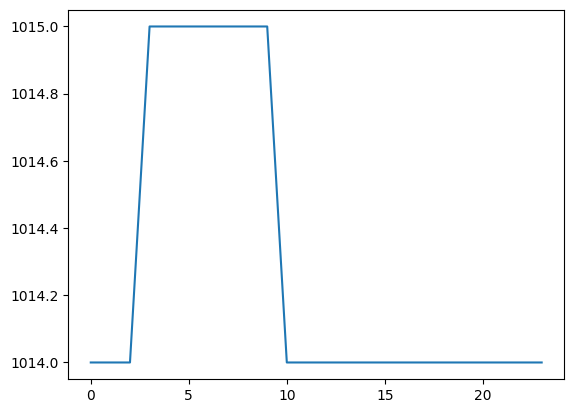

In [219]:
plt.plot(next_traj)

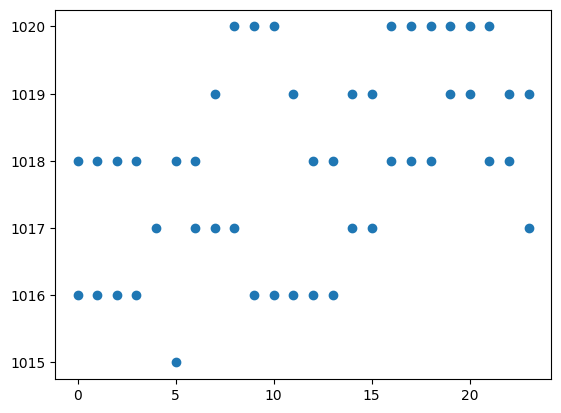

In [274]:
plt.scatter(sampled_hour,past_data)


In [ ]:
# Tutorial for operation. 

# Deploy Prediction 

In [264]:
# Deployment test:
txt_filepath = '../dataset/METAR_Data.txt'
window_length = 48
metar_dict_test_1 = get_metar_prediction_input(txt_filepath,window_length) # row 37482 to 37529
metar_dict_test_2 = get_metar_prediction_input(txt_filepath,window_length) # row 64055 to 64102
metar_dict_test_3 = get_metar_prediction_input(txt_filepath,window_length) # row 21310 to 21357

The data contains a total of : 89590 rows
The randomly selected sequence is from row 37482 to 37529
Input Data is now parsed
The data contains a total of : 89590 rows
The randomly selected sequence is from row 64055 to 64102
Input Data is now parsed
The data contains a total of : 89590 rows
The randomly selected sequence is from row 21310 to 21357
Input Data is now parsed
No Wind Detail info found on index 30, 'NoneType' object has no attribute 'speed' >>> Setting data as 0


In [265]:
metar_dict_test_1['metar_df']

,year,month,day,hour,minutes,wind_speed,wind_degrees,wind_min_var,wind_max_var,vis_distance,temperature,dew,air_pressure
0,2018,4,16,0,53,10,180.0,0.0,0.0,7.0,25,24,1015
1,2018,4,16,1,53,10,210.0,0.0,0.0,10.0,22,22,1017
2,2018,4,16,2,53,6,200.0,0.0,0.0,10.0,22,22,1017
3,2018,4,16,3,53,5,210.0,0.0,0.0,10.0,22,22,1017
4,2018,4,16,4,53,6,180.0,0.0,0.0,10.0,22,22,1016
5,2018,4,16,5,53,7,240.0,0.0,0.0,10.0,23,22,1016
6,2018,4,16,6,53,7,280.0,0.0,0.0,10.0,22,21,1016
7,2018,4,16,7,53,7,290.0,0.0,0.0,10.0,21,19,1016
8,2018,4,16,8,53,9,310.0,0.0,0.0,10.0,21,18,1016
9,2018,4,16,9,53,4,310.0,0.0,0.0,10.0,20,17,1017


In [272]:

data = metar_dict_test_1['metar_df']['air_pressure'].values
time_steps = 24
selected_model = Air_Pressure_Results[f'set2_window{time_steps}']['model']
propagation_steps = 12
next_val = get_next_value(selected_model, time_steps, data, rounding = True )

1/1 [==============================] - 0s 24ms/step
The next value in the given sequence is 1019


In [288]:
# df row containing the data 
metar_dict_test_1['metar_df'][47:]

,year,month,day,hour,minutes,wind_speed,wind_degrees,wind_min_var,wind_max_var,vis_distance,temperature,dew,air_pressure
47,2018,4,17,23,53,7,50.0,0.0,0.0,10.0,22,11,1018


In [286]:
metar_dict_test_1['metar_df'].loc[47,'day']

17

In [308]:
def wind_speed_format(value):
    return f"{value:02d}"
def wind_degree_format(value):
    return f"{value:03d}"
    
def hpa_to_inhg_format(hpa):
    inhg = hpa * 0.02953  # Convert hPa to inHg
    return f"A{int(inhg * 100):04d}"

In [310]:
hpa_to_inhg_format(1019)

'A3009'

In [319]:
def print_metar(input,row):
    airport_id = 'KMIA'
    day = input.loc[row,'day']
    hour = input.loc[row,'hour']
    minutes = input.loc[row,'minutes']
    degree = wind_degree_format(int(input.loc[row,'wind_degrees']))
    speed = wind_speed_format(input.loc[row,'wind_speed'])
    vis = int(input.loc[row,'vis_distance'])
    ## there will be loop here based on n_cloud_layers, stitch them together into cloud_string
    cloud_type = 'FEW' # fix this
    cloud_height = '250' # fix this
    cloud_string = cloud_type + cloud_height
    temperature = input.loc[row,'temperature']
    dew = input.loc[row,'dew']
    air_pressure = hpa_to_inhg_format(input.loc[row,'air_pressure'])
    
    metar_string = f'METAR {airport_id} {day}{hour}{minutes}Z {degree}{speed}KT {vis}SM {cloud_string} {temperature}/{dew} {air_pressure}'
    print('the corresponding metar formatted data for the given input is: ')
    print(metar_string)
    return metar_string

In [307]:
input = metar_dict_test_1['metar_df']
row = 47
metar_output = print_metar(input,row)

the corresponding metar formatted data for the given input is: 
METAR KMIA 172353Z 05007KT 10SM FEW250 22/11 Q1018


In [320]:
for a in [45,46,47]:
    input = metar_dict_test_1['metar_df']
    row = a
    print(a)
    metar_output = print_metar(input,row)

45
the corresponding metar formatted data for the given input is: 
METAR KMIA 172153Z 09008KT 10SM FEW250 24/12 A3006
46
the corresponding metar formatted data for the given input is: 
METAR KMIA 172253Z 06009KT 10SM FEW250 23/11 A3006
47
the corresponding metar formatted data for the given input is: 
METAR KMIA 172353Z 05007KT 10SM FEW250 22/11 A3006


In [315]:
print(metar_dict_test_1['parsed_metar_data'][45]['_message'])
print(metar_dict_test_1['parsed_metar_data'][46]['_message'])
print(metar_dict_test_1['parsed_metar_data'][47]['_message'])

KMIA 172153Z 09008KT 10SM CLR 24/12 A3007 RMK AO2 SLP183 T02440117
KMIA 172253Z 06009KT 10SM FEW050 23/11 A3008 RMK AO2 SLP185 T02330111
KMIA 172353Z 05007KT 10SM FEW050 22/11 A3009 RMK AO2 SLP190 T02220111 10267 20222 53008


In [321]:
metar_dict_test_1['parsed_metar_data'][45]

{'_wind': Wind[speed=8, direction=E, gust=None, degrees=90, unit=KT, min_variation=None, max_variation=None],
 '_visibility': Visibility[distance=10SM, min_distance=None, min_direction=None],
 '_vertical_visibility': None,
 '_wind_shear': None,
 '_cavok': None,
 '_remark': 'automated station with a precipitation discriminator sea level pressure of 1018.3 HPa  hourly temperature of 24.4°C and dew point of 11.7°C',
 '_remarks': ['automated station with a precipitation discriminator',
  'sea level pressure of 1018.3 HPa',
  '',
  'hourly temperature of 24.4°C and dew point of 11.7°C'],
 '_clouds': [],
 '_weather_conditions': [],
 '_day': 17,
 '_time': datetime.time(21, 53),
 '_message': 'KMIA 172153Z 09008KT 10SM CLR 24/12 A3007 RMK AO2 SLP183 T02440117',
 '_station': 'KMIA',
 '_flags': set(),
 '_trends': [],
 '_temperature': 24,
 '_dew_point': 12,
 '_altimeter': 1018,
 '_nosig': False,
 '_runways_info': []}

In [ ]:
## Start by extending the above df, and ther convert to METAR formatted output.